In [1]:
# Dependencies

import gmaps
import numpy as np
import pandas as pd
import requests
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress
from matplotlib import pyplot as plt
from config_Laura import (gkey)

In [2]:
walkscore_map = pd.read_csv('Resources_Laura/walkscore_mapping.csv')
property_dataset = pd.read_csv('Resources_Laura/clean_property_value.csv')

In [3]:
walkscore_map.head()

,ZipCode,County,Lat,Lng,walk score,bike score
0,95412,Sonoma County,38.713892,-123.326167,0,NaN
1,95017,Santa Cruz County,37.091858,-122.231354,0,3.0
2,94020,San Mateo County,37.291115,-122.208658,0,9.0
3,94060,San Mateo County,37.205116,-122.333426,0,10.0
4,93110,Santa Barbara County,34.508431,-119.731021,0,NaN


In [4]:
property_dataset.head()

,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/14,2/28/21,3/31/21,Bdrm,% Change,Lat,Lng
0,95412,Zip,CA,CA,Annapolis,Santa Rosa,Sonoma County,721046.0,526204,520369,1,-27.831373,38.713892,-123.326167
1,95412,Zip,CA,CA,Annapolis,Santa Rosa,Sonoma County,730825.0,653418,645435,2,-11.684056,38.713892,-123.326167
2,95412,Zip,CA,CA,Annapolis,Santa Rosa,Sonoma County,772083.0,935029,951287,3,23.210458,38.713892,-123.326167
3,95017,Zip,CA,CA,Davenport,Santa Cruz-Watsonville,Santa Cruz County,789701.0,609039,612187,1,-22.478634,37.091858,-122.231354
4,95017,Zip,CA,CA,Davenport,Santa Cruz-Watsonville,Santa Cruz County,669451.0,826864,847012,2,26.523375,37.091858,-122.231354


## Correlation between property value increase and walk-score

In [5]:
## rename region name to zip code, so that we can merge both datasets
property_dataset = property_dataset.rename(columns={'RegionName': 'ZipCode'})

In [6]:
## remove lat and long from the walkscore dataframe
walkscore_map = walkscore_map[['ZipCode','walk score','bike score']]

In [8]:
## merge the two datasets together
result = pd.merge(property_dataset, walkscore_map, on="ZipCode")

In [9]:
## remove null values in either CAGR, walk score or bike score
result = result.dropna()
len(result)

3404

In [10]:
# separating the zip codes by bedroom numbers
bedr_one = result.loc[result['Bdrm']==1]
bedr_two = result.loc[result['Bdrm']==2]
bedr_three = result.loc[result['Bdrm']==3]

The r-squared is : -0.0
y = -0.0x + 33.14


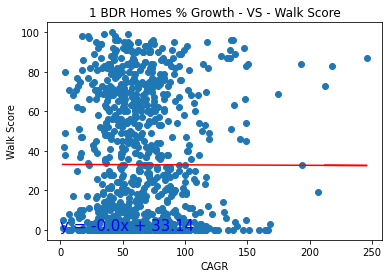

In [12]:
#plotting linear regression model to find correlation between % Change for houses with one bedroom and walk-score

x_values = bedr_one['% Change']
y_values = bedr_one['walk score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - Walk Score')
plt.xlabel('% Change')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.0
y = -0.0x + 33.35


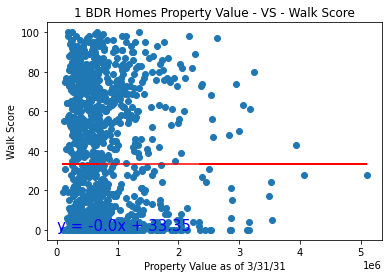

In [13]:
# finding correlation between property value and walk-score
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and walk-score

x_values = bedr_three['3/31/21']
y_values = bedr_three['walk score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes Property Value - VS - Walk Score')
plt.xlabel('Property Value as of 3/31/31')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

## Correlation between property value and bike score

The r-squared is : 0.04
y = 0.03x + 36.05


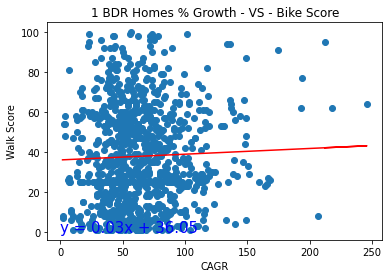

In [14]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = bedr_one['% Change']
y_values = bedr_one['bike score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - Bike Score')
plt.xlabel('% Change')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.01
y = -0.0x + 38.55


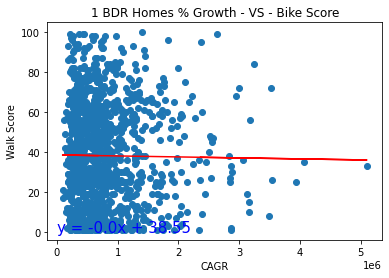

In [15]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = bedr_three['3/31/21']
y_values = bedr_three['bike score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - Bike Score')
plt.xlabel('% Change')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [17]:
# linear regression between CAGR for 1 bedr and 2 bedr

## replace column name for bedr two
bedr_two_fix = bedr_two.rename(columns={'% Change': '% Change_Two','3/31/21': '3/31/21_Two'})

## find the zipcodes that match by mergind the two datasets
one_two_bdr = pd.merge(bedr_one, bedr_two_fix, on="ZipCode")

The r-squared is : 0.58
y = 0.5x + 34.1


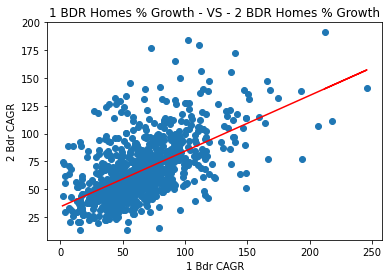

In [18]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = one_two_bdr['% Change']
y_values = one_two_bdr['% Change_Two']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - 2 BDR Homes % Growth')
plt.xlabel('1 Bdr % Change')
plt.ylabel('2 Bdr % Change')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [19]:
# linear regression between CAGR for 1 bedr and 3 bedr

## replace column name for bedr two
bedr_three_fix = bedr_three.rename(columns={'% Change': '% Change_Three','3/31/21': '3/31/21_Three'})

## find the zipcodes that match by mergind the two datasets
one_three_bdr = pd.merge(bedr_one, bedr_three_fix, on="ZipCode")

The r-squared is : 0.4
y = 0.31x + 42.91


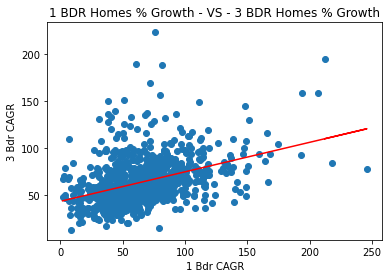

In [20]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = one_three_bdr['% Change']
y_values = one_three_bdr['% Change_Three']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - 3 BDR Homes % Growth')
plt.xlabel('1 Bdr % Change')
plt.ylabel('3 Bdr % Change')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [21]:
# linear regression between CAGR for 2 bedr and 3 bedr

## replace column name for bedr two
bedr_three_fix = bedr_three.rename(columns={'% Change': '% Change_Three','3/31/21': '3/31/21_Three'})

## find the zipcodes that match by mergind the two datasets
two_three_bdr = pd.merge(bedr_two, bedr_three_fix, on="ZipCode")

The r-squared is : 0.66
y = 0.58x + 24.52


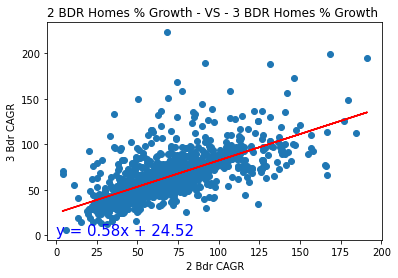

In [22]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = two_three_bdr['% Change']
y_values = two_three_bdr['% Change_Three']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('2 BDR Homes % Growth - VS - 3 BDR Homes % Growth ')
plt.xlabel('2 Bdr % Change')
plt.ylabel('3 Bdr % Change')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [11]:
bedr_one.head(1)

,ZipCode,RegionType,StateName,State,City,Metro,CountyName,1/31/14,2/28/21,3/31/21,Bdrm,% Change,Lat,Lng,walk score,bike score
3,95017,Zip,CA,CA,Davenport,Santa Cruz-Watsonville,Santa Cruz County,789701.0,609039,612187,1,-22.478634,37.091858,-122.231354,0,3.0


## Correlation Summary

 #### Poperty Growth - VS - Walk Score
     NO CORRELATION
 #### Poperty Growth - VS - Bike Score
     NO CORRELATION 
 #### Property Growth amongst two different property types    
     SOMEWHAT POSITIVE CORRELATION BETWEEN 2 BDR HOME GROWTH AND 3 BDR HOME GROWTH (R-SQUARE OF 0.66) 
 